Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [5]:
NAME = "Алена Реброва"
COLLABORATORS = "БПМ181"

---

# Интерполяция при помощи полиномов Лагранжа.

In [6]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        P = 0
        for i in range(len(self.xk)):
          lk = 1
          for j in range(len(self.xk)):
            if j != i:
              lk *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
              if lk == 0:
                break
            else:
              continue 
          P += (lk * self.yk[i])
        return P
        #raise NotImplementedError()

In [7]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


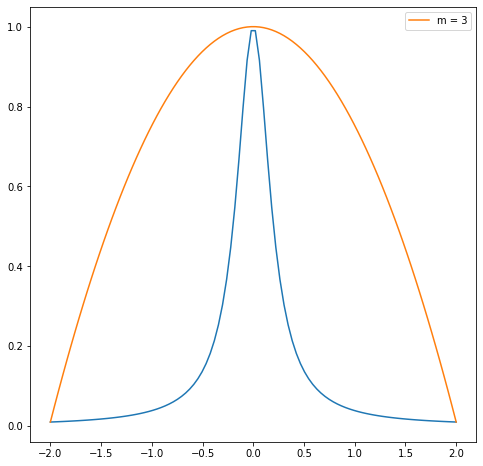

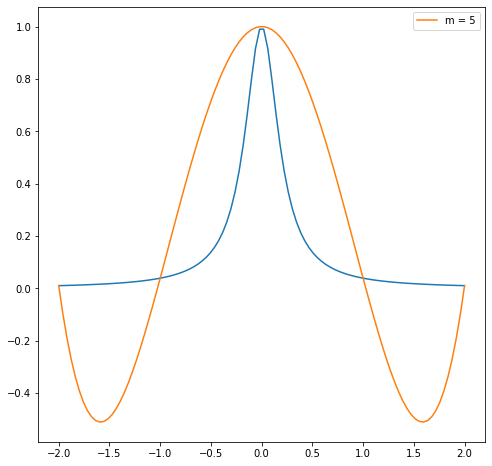

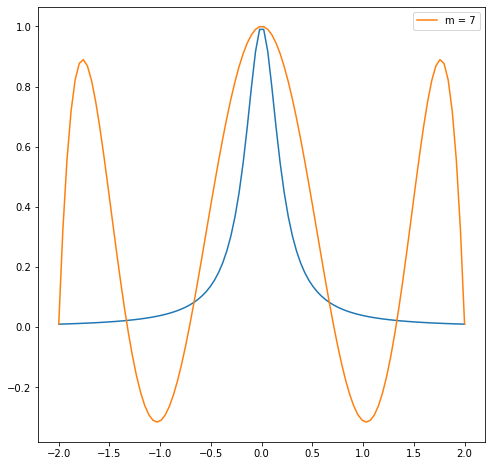

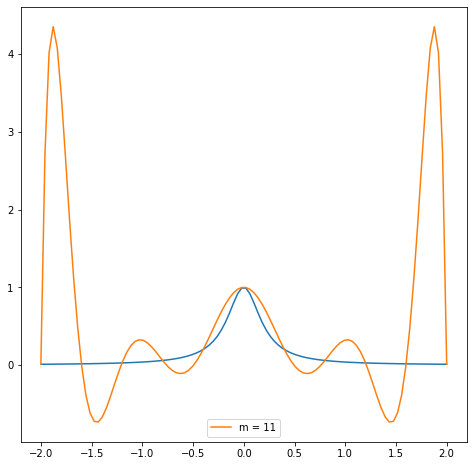

In [8]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)
import matplotlib.pyplot as plt


x = np.linspace(-2, 2, 100)
y = runge_func(x)

for step in [3, 5, 7, 11]:
  plt.figure(figsize=(8, 8))
  plt.plot(x, y)
  xx = np.linspace(-2, 2, step)
  yy = runge_func(xx)

  lagr = LagrangeInterpolator(xx, yy)
  yy_lagr = [lagr(xval) for xval in x]
  plt.plot(x, yy_lagr, label = 'm = ' + str(step))
  plt.legend()
  plt.show()